# Support Vector Machines

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets.samples_generator import make_blobs

In [5]:
x, y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)  ##creamos los features y el target

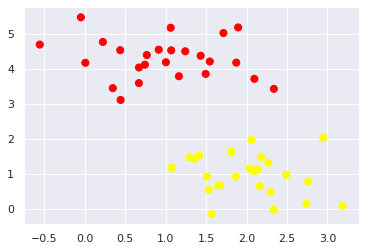

In [7]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap="autumn")

(-1, 3.5)

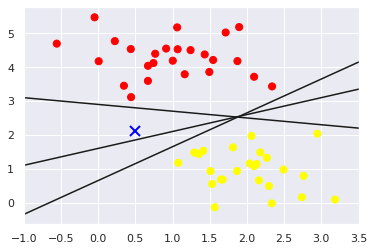

In [11]:
## creemos un punto que tengamos que clasificar
xx= np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],"x",color="blue",markeredgewidth=2,markersize=10)

## podemos poner en jaque nuestra imaginación de cual puede ser el hiperplano si es que lo vemos a ojo

for a, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy= a*xx+b
    plt.plot(xx,yy,"-k")

plt.xlim(-1,3.5)

**Con esto vemos claramente que el punto puede ser rojo o amarillo no es tan facil de ver a donde se irá, veamos que nos dice el SVM**

## Maximización del Margen

(-1, 3.5)

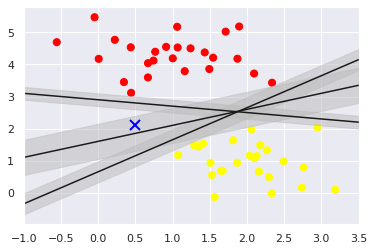

In [13]:
## creemos un punto que tengamos que clasificar
xx= np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],"x",color="blue",markeredgewidth=2,markersize=10)

## podemos poner en jaque nuestra imaginación de cual puede ser el hiperplano si es que lo vemos a ojo

for a, b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy= a*xx+b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d, edgecolor="none", color="#BBBBBB",alpha=0.5)
plt.xlim(-1,3.5)

**Lo que hace el SVM es utilizar la linea que maximice el área del pasillo que se genera, este pasillo va desde el centro de la linea hasta el primer punto encontrado.**

* Este pasillo es lo que llamamos soporte!

## Creación del modelo SVM

In [16]:
from sklearn.svm import SVC

In [29]:
model = SVC(kernel="linear", C =1E10)
model.fit(x,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print("los vectores de soporte son \n",model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

los vectores de soporte son 
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


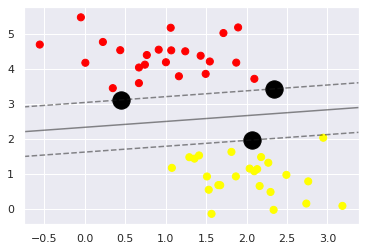

In [54]:
plt.scatter(x[:,0],x[:,1],c=y,s=50, cmap="autumn")
plt_svc(model)

* Los elementos en negro son los vectores de soporte, el pivot del modelo (además printeamos los vectores de supp)

In [55]:
def plot_svm(N=10,ax=None):
    x,y = make_blobs(n_samples=200,centers =2, random_state=0,cluster_std=0.6)
    
    x = x[:N]
    y = y[:N]
    model = SVC(kernel="linear",C=1E7)
    model.fit(x,y)
    
    ax=ax or plt.gca()
    ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    


los vectores de soporte son 
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
los vectores de soporte son 
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


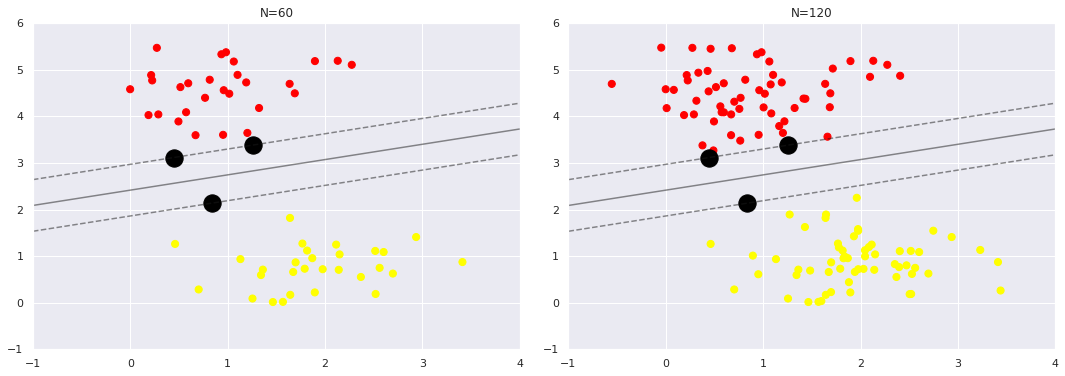

In [56]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace =0.1)
for ax_i, N, in zip(ax, [60,120]):
    plot_svm(N,ax_i)
    ax_i.set_title("N={0}".format(N))

In [57]:
from ipywidgets import interact, fixed

In [59]:
interact(plot_svm, N=[10,50, 100, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200), value=10), Output()), _dom_classes…

<function __main__.plot_svm(N=10, ax=None)>